In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [23]:
# parameter for input image
theImage ='images/tiger.jpg'
theImage ='images/oranges.jpg'
#theImage ='images/lion.jpg'
theImage ='images/four-lions.jpg'
theImage ='images/chairs.jpg'

# parameter for object recognition
theLabel = 'net_models/mobilenet_ssd_v1/coco-label.txt'
theGraph = 'net_models/mobilenet_ssd_v1/frozen_inference_graph.pb'
theConfig = 'net_models/mobilenet_ssd_v1/ssd_mobilenet_v1_coco_2017_11_17.pbtxt'
theThreshold = 0.2

In [3]:
# parameter for drawing on the image
theTextFont = cv2.FONT_HERSHEY_SIMPLEX
theTextScale = 0.8
theTextColor = (255, 0, 255)  # RGB value
theTextThickness = 2

In [4]:
# Model zoo
# https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md

In [4]:
classes = []
with open(theLabel, 'r') as f:
    classes = f.read().splitlines()

In [5]:
print(len(classes))

91


In [6]:
for i,v in enumerate(classes):
    print(i,v)

0 person
1 bicycle
2 car
3 motorcycle
4 airplane
5 bus
6 train
7 truck
8 boat
9 traffic light
10 fire hydrant
11 street sign
12 stop sign
13 parking meter
14 bench
15 bird
16 cat
17 dog
18 horse
19 sheep
20 cow
21 elephant
22 bear
23 zebra
24 giraffe
25 hat
26 backpack
27 umbrella
28 shoe
29 eye glasses
30 handbag
31 tie
32 suitcase
33 frisbee
34 skis
35 snowboard
36 sports ball
37 kite
38 baseball bat
39 baseball glove
40 skateboard
41 surfboard
42 tennis racket
43 bottle
44 plate
45 wine glass
46 cup
47 fork
48 knife
49 spoon
50 bowl
51 banana
52 apple
53 sandwich
54 orange
55 broccoli
56 carrot
57 hot dog
58 pizza
59 donut
60 cake
61 chair
62 couch
63 potted plant
64 bed
65 mirror
66 dining table
67 window
68 desk
69 toilet
70 door
71 tv
72 laptop
73 mouse
74 remote
75 keyboard
76 cell phone
77 microwave
78 oven
79 toaster
80 sink
81 refrigerator
82 blender
83 book
84 clock
85 vase
86 scissors
87 teddy bear
88 hair drier
89 toothbrush
90 hair brush


In [7]:
# load freezed model from disk
net = cv2.dnn.readNetFromTensorflow(theGraph, theConfig)

Image height: 1500, width: 1500


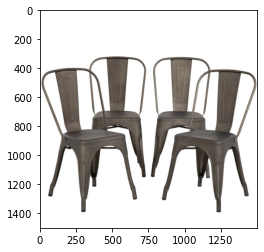

In [8]:
# load image
image = cv2.imread(theImage)
(h,w) = image.shape[:2] # rows, cols
print(f"Image height: {h}, width: {w}")
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
plt.imshow(img_rgb)  # plot image
plt.show()

In [9]:
blob = cv2.dnn.blobFromImage(image, size=(300,300), swapRB=True, crop=False)
net.setInput(blob)
outs = net.forward()  # find the predictions

In [10]:
print(outs.shape)

(1, 1, 100, 7)


In [11]:
detections = outs[0,0,:,:]
print(detections.shape)
# class id, score, left, top, right, bottom

(100, 7)


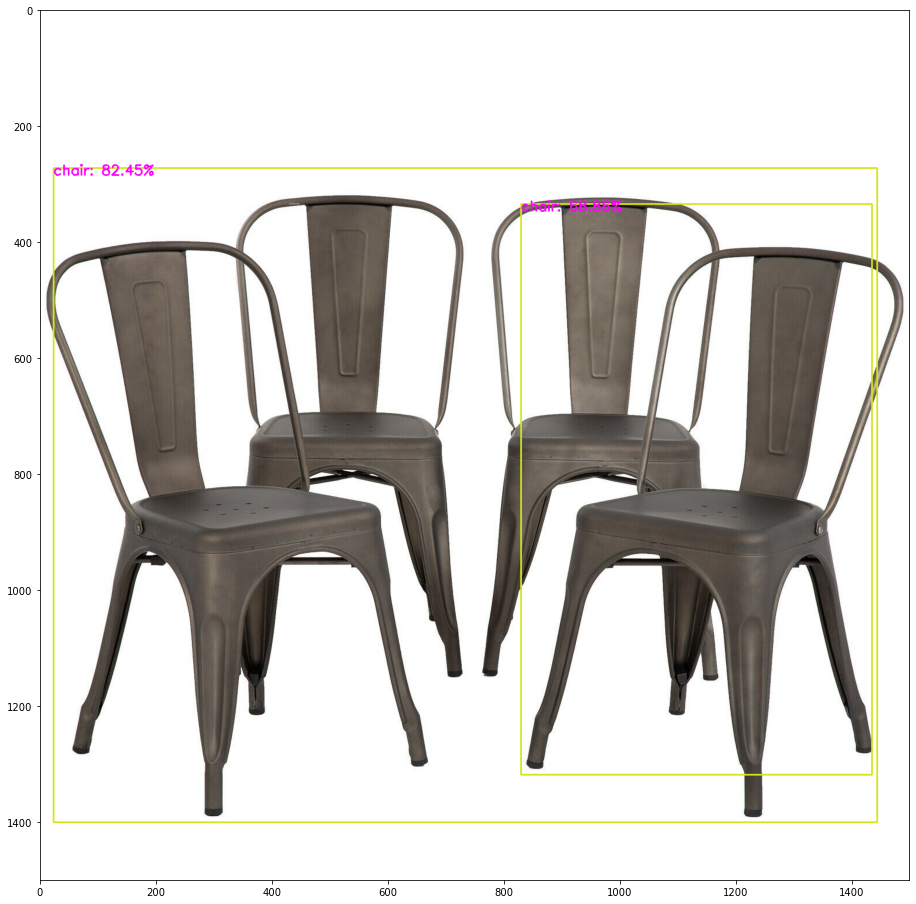

In [12]:
frame = image.copy()
for detection in detections:
    score = detection[2]
    # print('[INFO]', detection)
    if score > theThreshold:
        classid = int(detection[1]) - 1
        left = int(detection[3] * w)
        top  = int(detection[4] * h)
        right = int(detection[5] * w)
        bottom = int(detection[6] * h)
        label = classes[classid]
        prob = round(score * 100, 2)
        text = "{}: {:.2f}%".format(label,prob)
        cv2.rectangle(frame, (left, top), (right, bottom), (23, 230, 210), thickness=2)
        cv2.putText(frame, text, (left, top+12), theTextFont, theTextScale, theTextColor, theTextThickness)

        
img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
plt.figure(figsize=(16,16))  # make the plot bigger
plt.imshow(img_rgb)  # plot image
plt.show()

In [24]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("CAMERA IS BROKEN")
while cap.isOpened():
    _, image = cap.read()
    if not _:
        print("cant receive frame")
        break
    #image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    blob = cv2.dnn.blobFromImage(image, size=(300,300), swapRB=True, crop=False)
    net.setInput(blob)
    outs = net.forward() 
    detections = outs[0,0,:,:]
    frame = image.copy()
    for detection in detections:
        score = detection[2]
        # print('[INFO]', detection)
        if score > theThreshold:
            classid = int(detection[1]) - 1
            left = int(detection[3] * w)
            top  = int(detection[4] * h)
            right = int(detection[5] * w)
            bottom = int(detection[6] * h)
            label = classes[classid]
            prob = round(score * 100, 2)
            text = "{}: {:.2f}%".format(label,prob)
            cv2.rectangle(frame, (left, top), (right, bottom), (23, 230, 210), thickness=2)
            cv2.putText(frame, text, (left, top+12), theTextFont, theTextScale, theTextColor, theTextThickness)
    #frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    cv2.imshow('img',frame)
    if cv2.waitKey(1)  & 0xFF == ord('q'):
        break
    if cv2.getWindowProperty('img', cv2.WND_PROP_VISIBLE) < 1:
        break
cap.release()
cv2.destroyAllWindows()

In [27]:
# https://www.tensorflow.org/lite/models/object_detection/overview
# https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API
# https://www.tensorflow.org/tutorials
# https://github.com/opencv/opencv/blob/master/samples/dnn/object_detection.py


In [ ]:
#labelSize, baseLine = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, 0.5, 1)
#top = max(top, labelSize[1])
#cv2.rectangle(frame, (left, top - labelSize[1]), (left + labelSize[0], top + baseLine), (255, 255, 255), cv.FILLED)
#cv2.putText(frame, label, (left, top), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))